In [94]:
#John Mark T. Enhaynes
#2018162107

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as ply
import plotly.express as px
import plotly.graph_objects as go

%matplotlib notebook

In [95]:
#reading the csv file form github, and cleaning the data table for our use

url = "https://raw.githubusercontent.com/m23chaffee/DS100-Repository/main/Aluminum%20Alloy%20Data%20Set.csv"
alloy = pd.read_csv('https://raw.githubusercontent.com/m23chaffee/DS100-Repository/main/Aluminum%20Alloy%20Data%20Set.csv')
del alloy['temper']
alloy = alloy.rename(columns={'aluminum_alloy':'Alloy Number',
                              'modulus_elastic': 'Elastic Modulus',
                              'modulus_shear': 'Shear Modulus',
                              'strength_yield': 'Yield Strength',
                              'strength_tensile': 'Tensile Strength'
                             })
alloy

,Alloy Number,Elastic Modulus,Shear Modulus,Yield Strength,Tensile Strength
0,1100,10.0,3.75,3.5,11.0
1,1100 - H12,10.0,3.75,11.0,14.0
2,2014,10.8,4.00,8.0,22.0
3,2014 - T6,10.6,4.00,58.0,66.0
4,2014 - T62,10.8,4.00,59.0,67.0
5,2017 - T4,10.5,3.95,32.0,55.0
6,2024 - T3,10.6,4.00,42.0,64.0
7,2024 - T4,10.6,4.00,40.0,62.0
8,2025 - T6,10.4,3.90,33.0,52.0
9,2124 - T851,10.4,4.00,57.0,66.0


In [96]:
#double checking if the data is on float
alloy.dtypes

Alloy Number         object
Elastic Modulus     float64
Shear Modulus       float64
Yield Strength      float64
Tensile Strength    float64
dtype: object

<IPython.core.display.Javascript object>


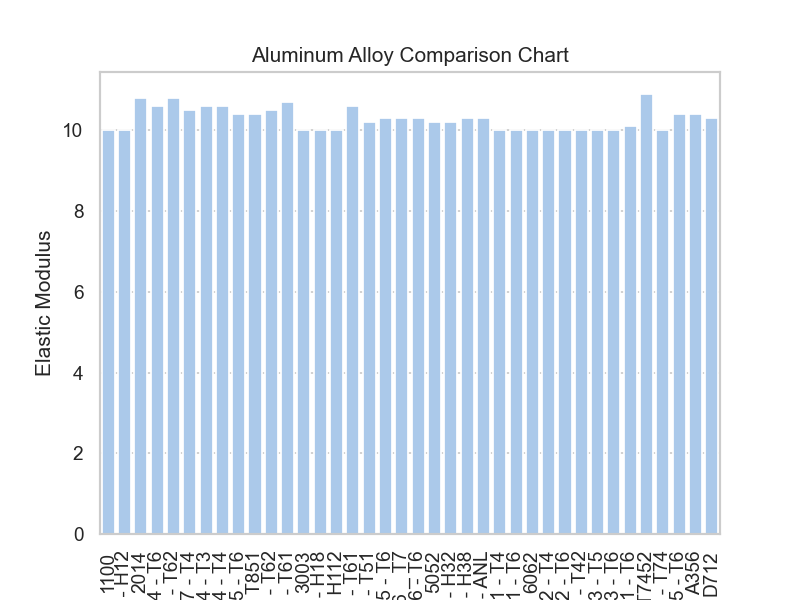

In [97]:
#generating bar graph using seaborn
sns.set_theme(style="whitegrid")

#fig 1 is for elastic modulus of aluminum alloy
fig1 = sns.set_color_codes("pastel")
sns.barplot(x="Alloy Number", 
            y="Elastic Modulus", 
            data=alloy,
            ci = None,
            label="Aluminum Alloy Comparison Chart", 
            color="b").set(title='Aluminum Alloy Comparison Chart')
plt.xticks(rotation = 90)

fig1
#the usage of sns on this one marks that graph is working as intended

In [131]:
# setting up bar chart

bar1 = px.bar(alloy,
            x = "Alloy Number",
            y = ["Elastic Modulus", "Shear Modulus","Yield Strength","Tensile Strength"],
            barmode = 'group',
            width = 1100,
            height =500,
            orientation = 'v',
            color_discrete_sequence = px.colors.qualitative.Pastel,
            labels={"value": "Data Values"},
            template = 'seaborn').update_traces(legendgroup="group").update_layout(showlegend=False)

In [132]:
# setting up line graph

line1 = px.line(alloy,
            x = "Alloy Number",
            y = ["Elastic Modulus", "Shear Modulus","Yield Strength","Tensile Strength"],
            width = 1100,
            height =500,
            orientation = 'v',
            color_discrete_sequence = px.colors.qualitative.Pastel,
            labels={"value": "Data Values"},
            template = 'seaborn').update_traces(legendgroup="group",visible='legendonly').update_layout(showlegend=False)

In [155]:
b1 = [trace for trace in bar1.select_traces()]
l1 = [trace.update({'showlegend':False}) for trace in l1]

fig=go.Figure(data=b1+l1)

# Add button
fig.update_layout(
    updatemenus=[
        dict(
            type = "buttons",
            direction = "left",
            buttons=list([
                dict(
                    args=['type', 'bar'],
                    label="Bar Graph",
                    method="restyle",
                ),
                dict(
                    args=["type", "line"],
                    label="Line Graph",
                    method="restyle"
                )
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.11,
            xanchor="left",
            y=1.1,
            yanchor="middle"
        ),
    ]
)
fig.update_layout(legend=dict(groupclick="toggleitem",
                             title_text='Mechanical Property'))
fig.update_layout(title_text='Aluminum Alloy Comparison Chart')
fig.update_xaxes(title_text='Aluminum Alloys')

fig.show()

Aluminum alloys are widely used in various industries due to their light weight, high strength, and corrosion resistance. Some observed trends in the use of aluminum alloys include an increase in their use in the transportation industry (e.g. in automobiles and airplanes) and in construction (e.g. in building facades and window frames). Additionally, there has been a trend towards the development of new, high-performance aluminum alloys that have improved strength and toughness, as well as enhanced thermal stability and fatigue resistance.

In this data visualization, a good way to use the data is to compare various aluminum alloys with their mechanical properties (e.g. elastic and shear modulus, and yield and tensile strength). Since there are various temper that exists in some alloys, it is best to compare their difference to one antoher.

In terms of custom buttons and toggle clicking, these are typically used as a form of user interface (UI) design in software applications. Custom buttons and toggle clicks allow users to easily navigate through different options or settings within the application, and can be designed to provide a more intuitive and user-friendly experience. These buttons and toggles can be customized to match the overall aesthetic of the application, and can also be programmed to perform specific actions when clicked.
It is mainly used as a comparison of user interface and user experience .